# 🌲  DecisionTreeClassifier

| الباراميتر          | المعنى                                                               | الهدف                             |
| ------------------- | -------------------------------------------------------------------- | --------------------------------- |
| `criterion`         | المقياس المستخدم لتحديد جودة الـ split (مثل `"gini"` أو `"entropy"`) | يحدد طريقة قياس النقاء في كل عقدة |
| `max_depth`         | أقصى عمق للشجرة                                                      | لتقليل overfitting                |
| `min_samples_split` | أقل عدد عينات لتقسيم العقدة                                          | لو أقل من كده، العقدة تصبح leaf   |
| `min_samples_leaf`  | أقل عدد عينات في أي leaf                                             | يمنع تكوين leaf صغير جدًا         |
| `max_leaf_nodes`    | أقصى عدد أوراق (leaves) في الشجرة                                    | للتحكم في حجم الشجرة              |
| `splitter`          | طريقة اختيار الـ feature عند كل split ("best" أو "random")           | Random Forest بيستخدم "random"    |


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [6]:
iris = load_iris(as_frame=True)

In [10]:
x = pd.DataFrame(iris.data)
y = pd.Series(iris.target)

In [12]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42 , test_size=.2)

In [30]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train.iloc[:, :2] , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred = dt.predict(x_test.iloc[:, :2])

In [32]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.67      0.67      0.67         9
           2       0.77      0.91      0.83        11

    accuracy                           0.80        30
   macro avg       0.81      0.79      0.80        30
weighted avg       0.82      0.80      0.80        30



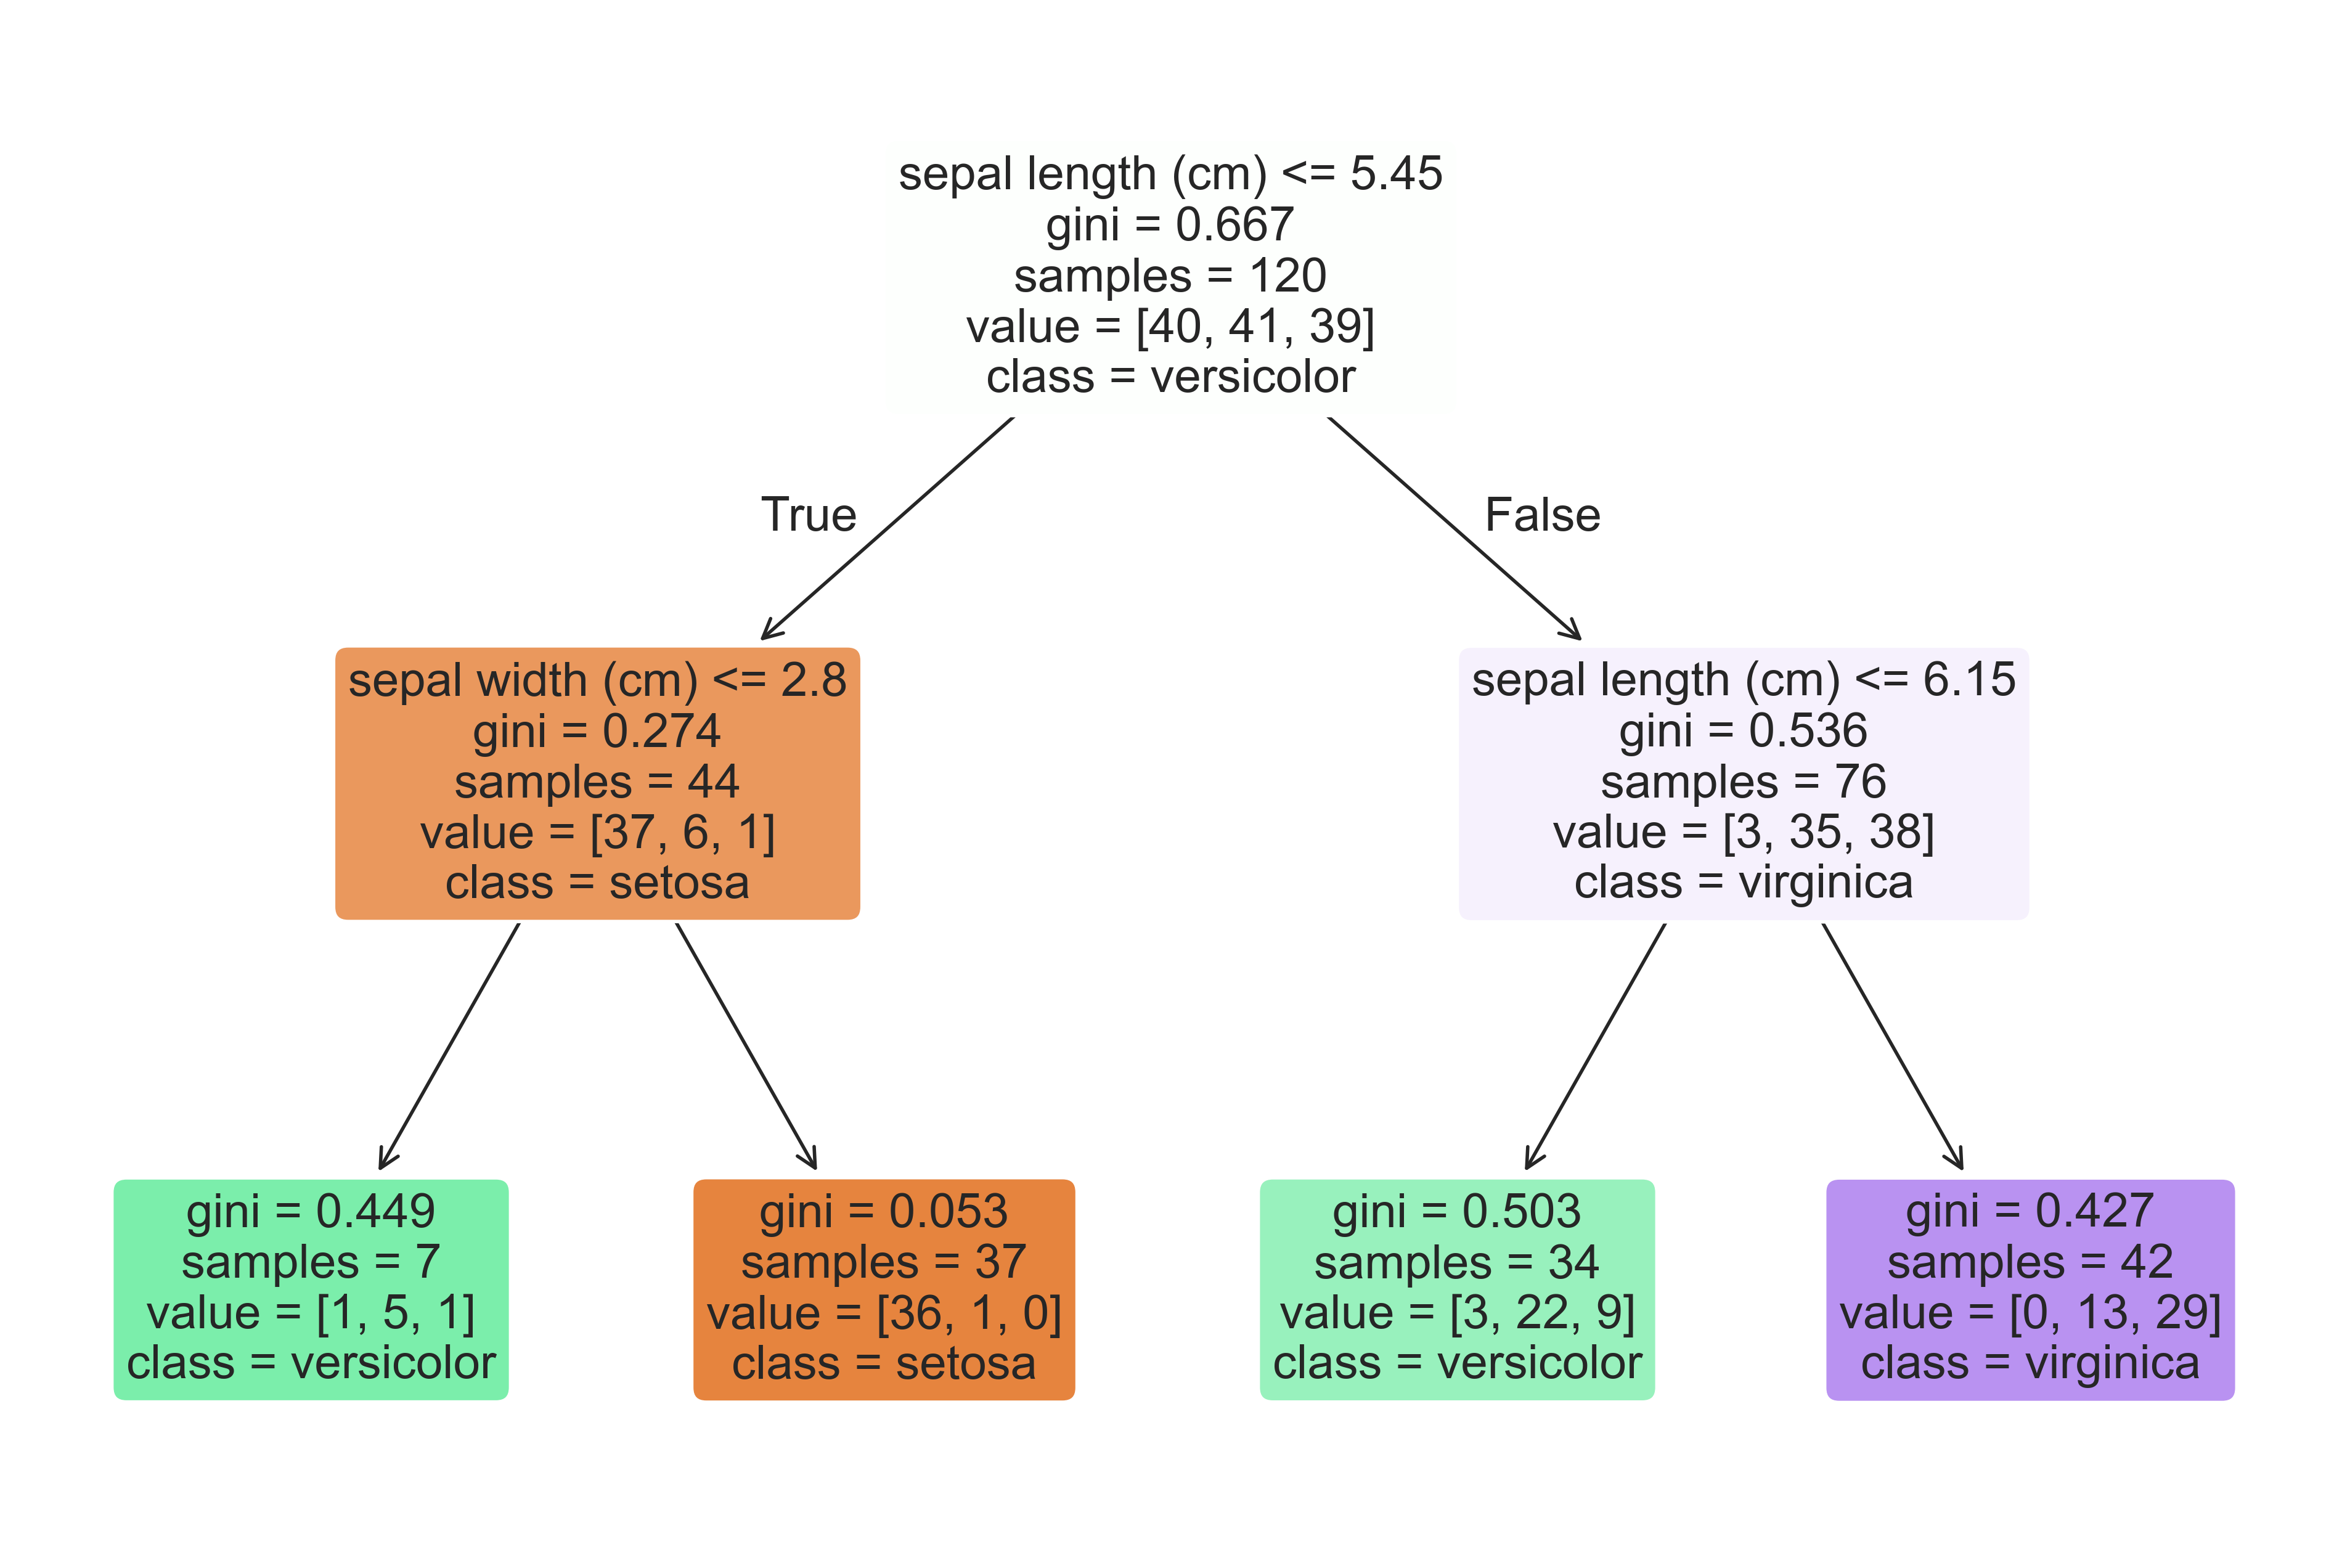

In [33]:
plt.figure(figsize=(12,8) ,dpi=400)
plot_tree(dt
          ,feature_names=iris['feature_names']
          ,class_names=iris['target_names']
          ,filled=True,
          rounded=True)
plt.show()